In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT1G35220,AT1G35220
AT2G40670,RR16


In [3]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

In [4]:
Res_combined <- readRDS('../Pathogen_JC14_3DM/Rdata/Res_combined.rds')

In [5]:
merged_l2FC_published <- readRDS("generated_data/merged_l2FC_clean.rds")

In [6]:
Res_all_l2FC <- merged_l2FC_published %>% dplyr::rename("source" = "condition", "AGI" = "gene_id") %>% dplyr::select(-gene_name) %>% rbind(Res_combined)

In [7]:
Res_all_l2FC <- Res_all_l2FC %>% left_join(map_id_name, by = c("AGI" = "gene_id")) 

In [8]:
Res_all_l2FC %>% pull(source) %>% unique()

[1] "acd6_9am"       "acd6_9pm"       "bak1serk4"      "dm2h_NIL"      
 [5] "sulki"          "Est_R4_4h"      "ka120"          "hos15"         
 [9] "ssi2-2"         "ssi2-1"         "ssi2-3"         "DM6/DM7"       
[13] "DM1/DM2d"       "DM10/DM11"      "AvrRpt2-6h"     "AvrRpt2-12h"   
[17] "AvrRpt2-20h"    "AvrRps4-6h"     "AvrRps4-12h"    "AvrRps4-20h"   
[21] "DM1/DM2d_adr1s" "DM6/DM7_adr1s"  "Col-0_adr1s"

In [9]:
Res_all_l2FC_sim <- Res_all_l2FC %>% filter(source %in% c('acd6_9am', 'ssi2-1', 'DM6/DM7', 'DM1/DM2d', 'Col-0_adr1s' ))

In [10]:
#read excel
DOF_family <- readxl::read_excel('../Pathogen_JC14_3DM/refs/DOFs_Ath.xlsx')

In [11]:
DOF_family

TF ID,Description,gene_id
<chr>,<chr>,<chr>
AT1G07640.1,Dof family protein,AT1G07640
AT1G07640.2,Dof family protein,AT1G07640
AT1G07640.3,Dof family protein,AT1G07640
AT1G21340.1,Dof family protein,AT1G21340
AT1G26790.1,Dof family protein,AT1G26790
AT1G28310.1,Dof family protein,AT1G28310
AT1G28310.2,Dof family protein,AT1G28310
AT1G29160.1,Dof family protein,AT1G29160
AT1G47655.1,Dof family protein,AT1G47655


In [12]:
WRKY_family <- readxl::read_excel('../Pathogen_JC14_3DM/refs/WRKY_Ath.xlsx')

In [13]:
Pathways_Ngou_2021 <- readxl::read_excel("../gene_table_and_other_scripts/Ngou_2021_Nature_figure2E_pathways_mod.xlsx")

In [14]:
Pathways <- Pathways_Ngou_2021 %>% dplyr::select(Target, GeneFamily)
Pathways <- Pathways %>%as.data.frame  %>% dplyr::rename('AGI' = 'Target')
LRRs <- Pathways %>% filter(GeneFamily %>% str_detect('LRR'))

In [15]:
RLKs <- LRRs %>% filter( GeneFamily %>% str_detect('RLK'))

In [16]:
RLPs <- LRRs %>% filter( GeneFamily %>% str_detect('RLP'))

In [17]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [18]:
TIRs <- NLRs_and_TIRs %>% filter( Class =='TIR')

In [19]:
NLRs <- NLRs_and_TIRs %>% filter( Class !='TIR')

In [20]:
Res_all_l2FC_sim %>% pull(source) %>% unique()

[1] "acd6_9am"    "ssi2-1"      "DM6/DM7"     "DM1/DM2d"    "Col-0_adr1s"

In [21]:
Res_all_l2FC_sim <- Res_all_l2FC_sim %>%
  mutate(source = case_when(
    source == "acd6_9am" ~ "acd6",
    source == "ssi2-1" ~ "ssi2-1", 
    source == "Col-0_adr1s" ~ "Col-0_adr1s",
    source == "DM6/DM7" ~ "DM6-DM7",
    source == "DM1/DM2d" ~ "DM1-DM2d",
    TRUE ~ source  # keep any other values unchanged
  )) %>%
  mutate(source = factor(source, levels = c( "acd6", "ssi2-1",  "DM6-DM7", "DM1-DM2d", "Col-0_adr1s")))

In [22]:
Res_DOFs <- Res_all_l2FC_sim %>% filter(AGI %in% DOF_family$gene_id)
WRKY_family <- WRKY_family %>% dplyr::mutate( gene_id = toupper(`Locus ID`))
Res_WRKYs <- Res_all_l2FC_sim %>% filter(AGI %in% WRKY_family$gene_id)

# Res_LRRs <- Res_all_l2FC_sim %>% filter(AGI %in% LRRs$AGI)
Res_RLKs <- Res_all_l2FC_sim %>% filter(AGI %in% RLKs$AGI)
Res_RLPs <- Res_all_l2FC_sim %>% filter(AGI %in% RLPs$AGI)

Res_NLRs <- Res_all_l2FC_sim %>% filter(AGI %in% NLRs$AGI)
Res_TIRs <- Res_all_l2FC_sim %>% filter(AGI %in% TIRs$AGI)

In [23]:
library(ggplot2)

# Define manual colors for each source
source_colors <- c(
  "acd6" = "#d67e7f", #"#E31A1C",
  "ssi2-1" = "#F1B58B", 
  "DM6-DM7" = '#EEC6BF',
  "DM1-DM2d" = '#C994B8',
  "Col-0_adr1s" = '#008DFB'
)

# Function to create violin plot with jittered points
plot_violin_by_source <- function(Res) {
  # Create violin plot
  ggplot(Res, aes(x = source, y = log2FC, fill = source)) +
    geom_violin(alpha = 0.7) +
    geom_jitter(width = 0.2, alpha = 0.6, size = 1.5, shape = 1, color = "black") +
    facet_wrap(~ source, nrow = 1, scales = "free_x") +
    scale_fill_manual(values = source_colors) +
   geom_hline(yintercept = 0,  color = "red", alpha = 0.9) +
    theme_minimal() +
    theme(
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.text = element_text(size = 10, face = "bold"),
      legend.position = "none"
    ) +
    labs(
      x = "Source",
      y = "log2 Fold Change",
      title = "Distribution of log2FC by Source"
    )
}

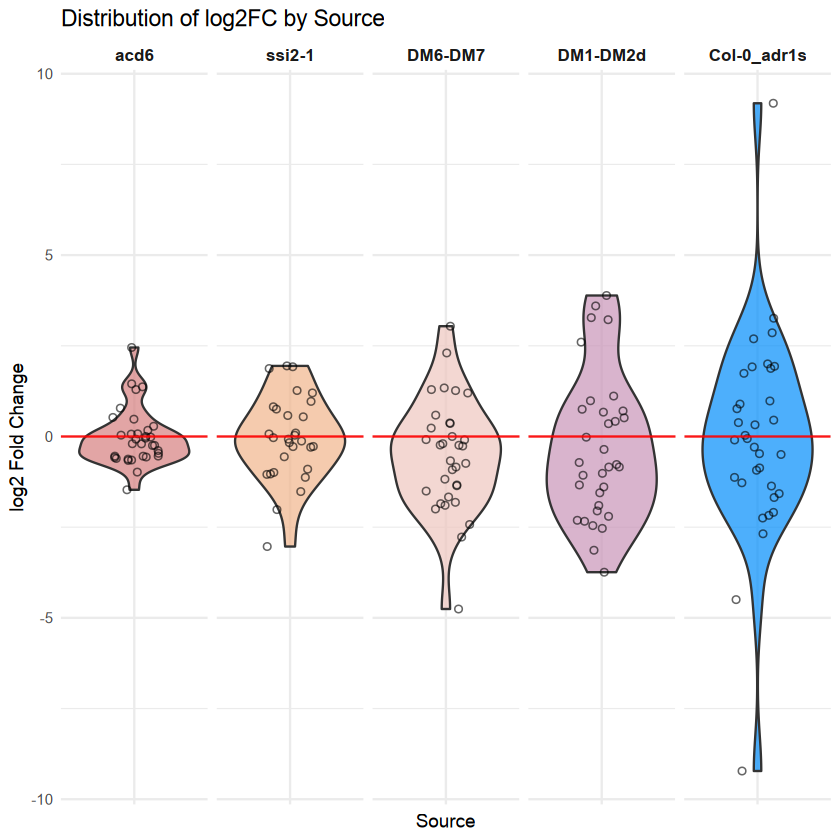

In [24]:
Res_DOFs %>% plot_violin_by_source 

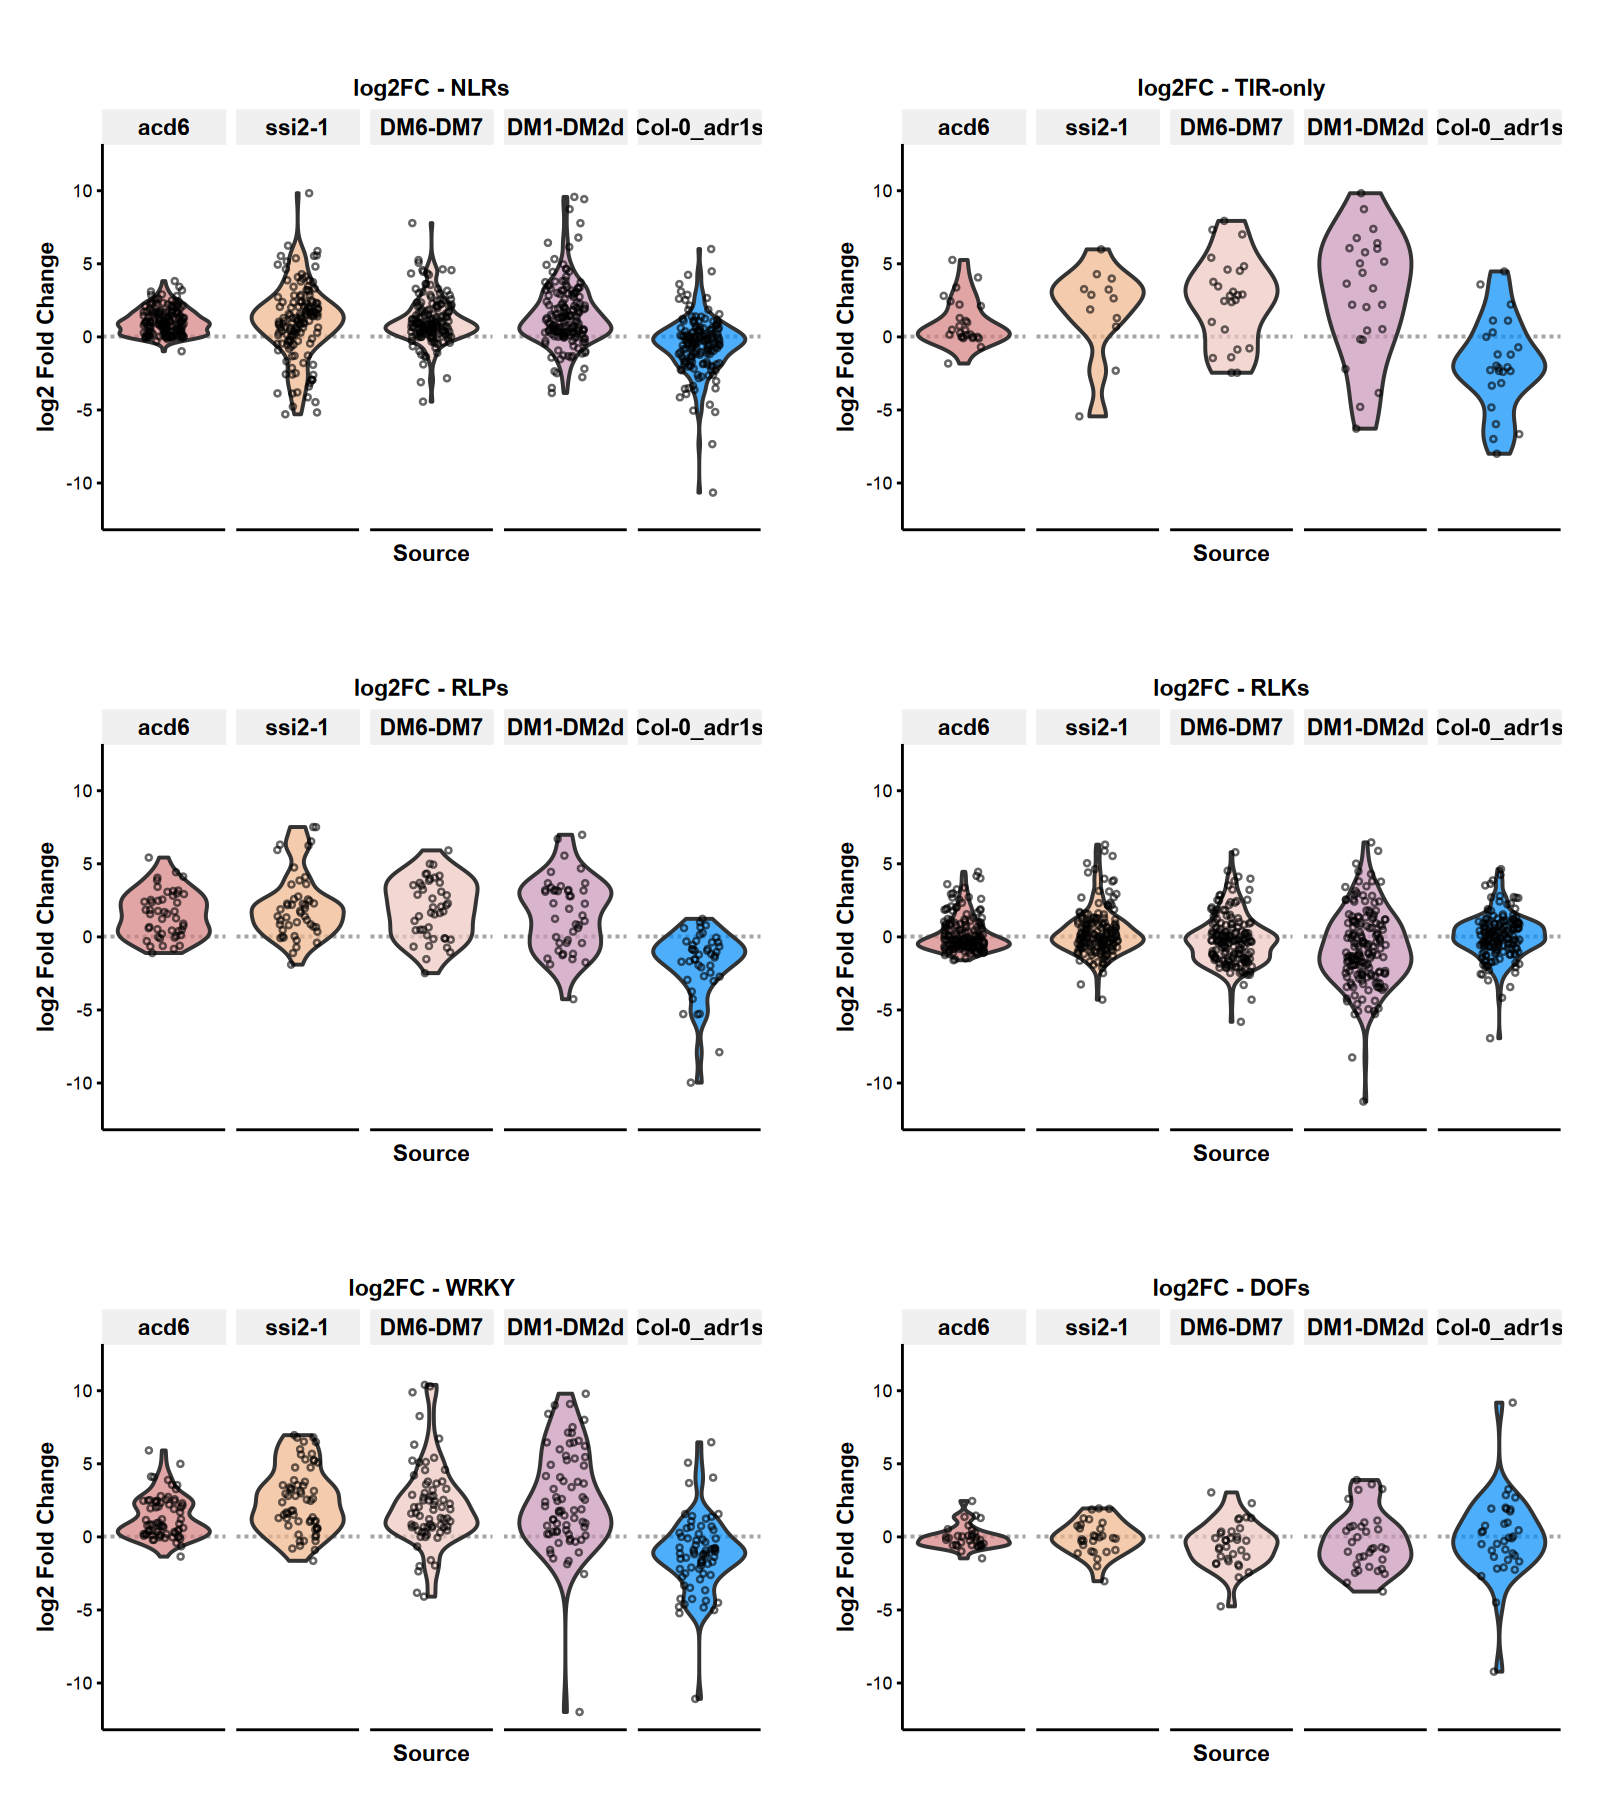

In [25]:
width_ <- 8
height_ <- 9
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# Function to create violin plot with jittered points
plot_violin_by_source <- function(Res, title_suffix = "") {
  
  # Create violin plot
  ggplot(Res, aes(x = source, y = log2FC, fill = source)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "gray50", alpha = 0.7) +
    geom_violin(alpha = 0.7) +
    geom_jitter(width = 0.2, alpha = 0.6, size = 0.5, shape = 1, color = "black") +
    facet_wrap(~ source, nrow = 1, scales = "free_x") +
    scale_fill_manual(values = source_colors) +
    scale_y_continuous(limits = c(-12, 12)) + 
    
    theme_minimal() +  theme_Publication() +
    theme(
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.text = element_text(size = 8, face = "bold"),
      legend.position = "none"
    ) +
    labs(
      x = "Source",
      y = "log2 Fold Change",
      title = paste("log2FC", title_suffix)
    ) 
}

# Create the four plots
NLRs_plot <- plot_violin_by_source(Res_NLRs, "- NLRs")
TIRs_plot <- plot_violin_by_source(Res_TIRs, "- TIR-only")
RLKs_plot <- plot_violin_by_source(Res_RLKs, "- RLKs")
DOFs_plot <- plot_violin_by_source(Res_DOFs, "- DOFs") 
WRKY_plot <- plot_violin_by_source(Res_WRKYs, "- WRKY")
RLPs_plot <- plot_violin_by_source(Res_RLPs, "- RLPs")

# Arrange plots in 2x2 grid
grid_plot <- grid.arrange(NLRs_plot, TIRs_plot,  RLPs_plot, RLKs_plot, WRKY_plot, DOFs_plot,ncol = 2)
ggsave("grid_plot.pdf", grid_plot, width = 8, height = 6)

ggsave("plots/grid_plot.pdf.pdf", grid_plot, h = height_, w = width_)

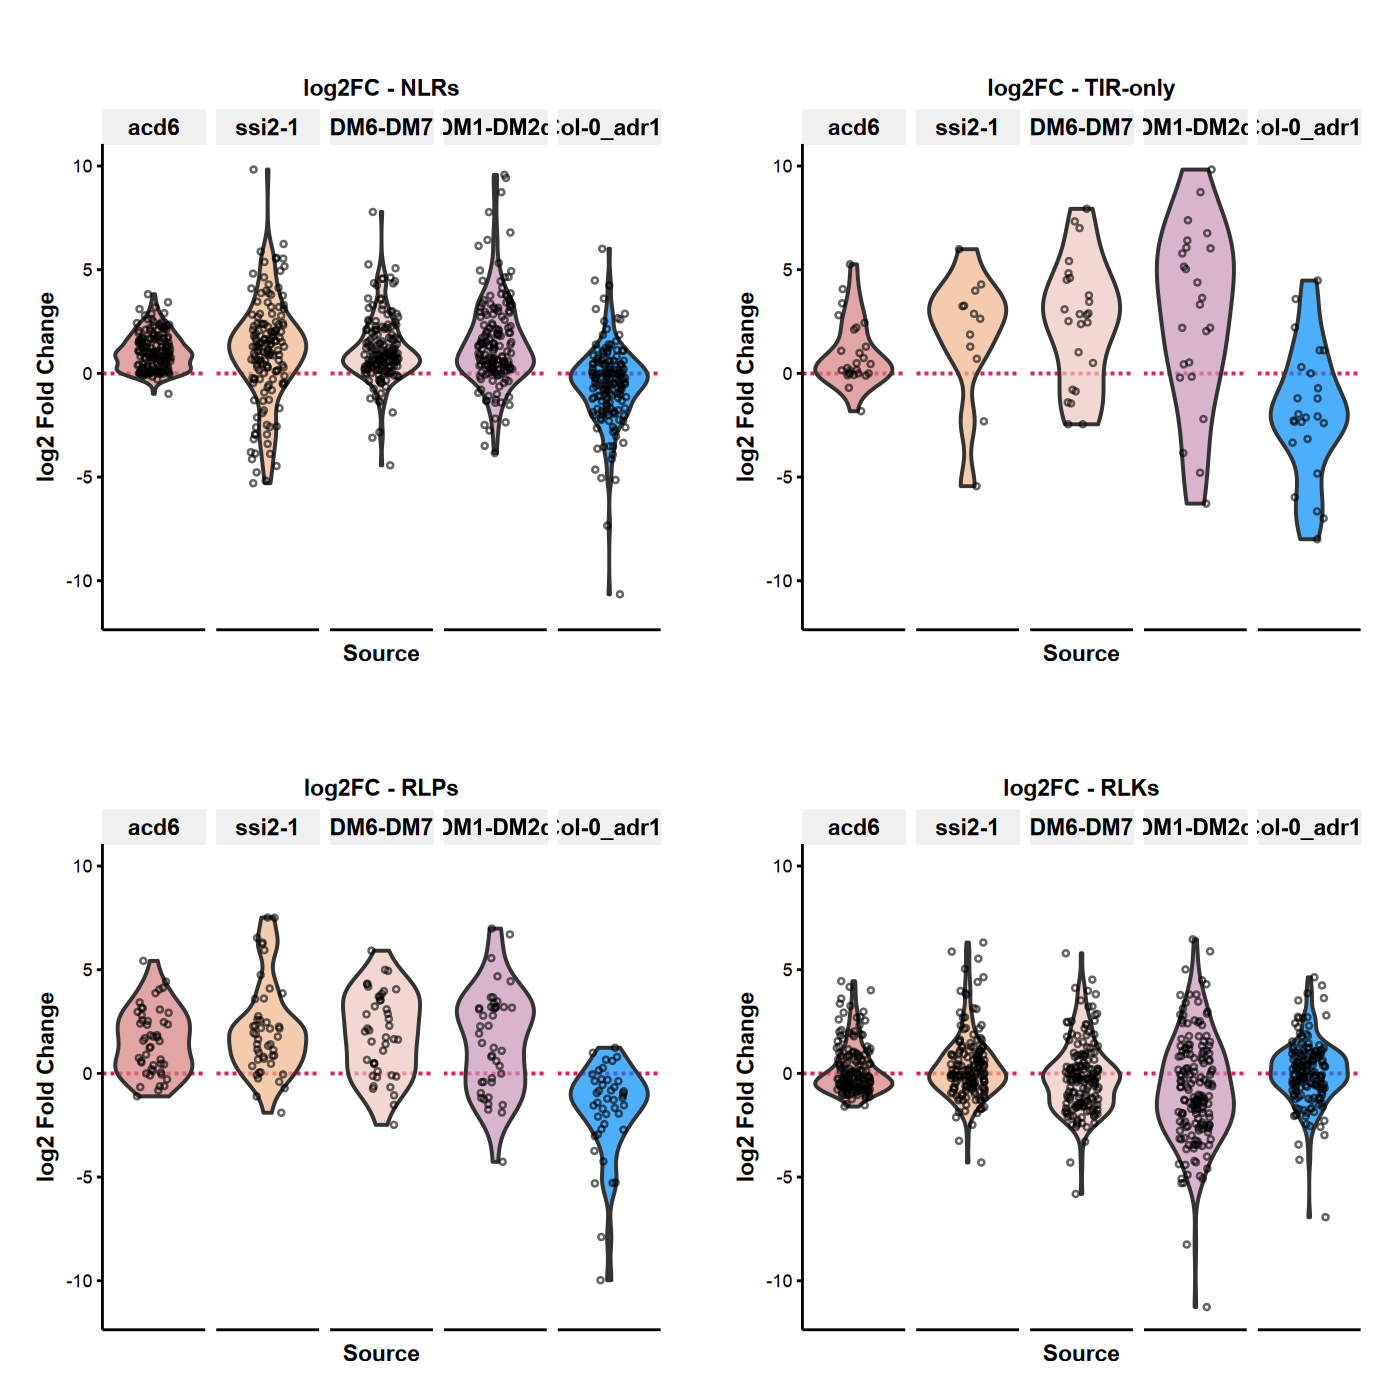

In [69]:
width_ <- 7
height_ <- 7
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# Function to create violin plot with jittered points
plot_violin_by_source <- function(Res, title_suffix = "") {
  
  # Create violin plot
  ggplot(Res, aes(x = source, y = log2FC, fill = source)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "#e61c5f", alpha = 1) +
    geom_violin(alpha = 0.7) +
    geom_jitter(width = 0.2, alpha = 0.6, size = 0.5, shape = 1, color = "black") +
    facet_wrap(~ source, nrow = 1, scales = "free_x") +
    scale_fill_manual(values = source_colors) +
    scale_y_continuous(limits = c(-11.3, 10)) + 
    
    theme_minimal() +  theme_Publication() +
    theme(
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.text = element_text(size = 8, face = "bold"),
      legend.position = "none"
    ) +
    labs(
      x = "Source",
      y = "log2 Fold Change",
      title = paste("log2FC", title_suffix)
    ) 
}

# Create the four plots
NLRs_plot <- plot_violin_by_source(Res_NLRs, "- NLRs")
TIRs_plot <- plot_violin_by_source(Res_TIRs, "- TIR-only")
RLKs_plot <- plot_violin_by_source(Res_RLKs, "- RLKs")
# DOFs_plot <- plot_violin_by_source(Res_DOFs, "- DOFs") 
# WRKY_plot <- plot_violin_by_source(Res_WRKYs, "- WRKY")
RLPs_plot <- plot_violin_by_source(Res_RLPs, "- RLPs")

# Arrange plots in 2x2 grid
grid_plot <- grid.arrange(NLRs_plot, TIRs_plot,  RLPs_plot, RLKs_plot,ncol = 2)
ggsave("grid_plot.pdf", grid_plot, width = 8, height = 6)

ggsave("plots/grid_plot2.pdf.pdf", grid_plot, h = height_, w = width_)

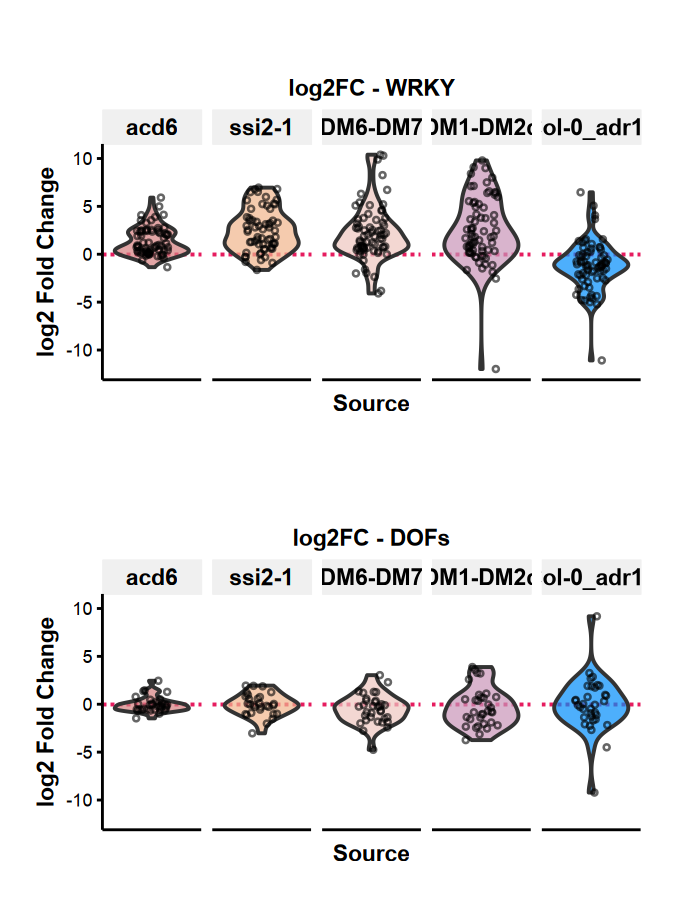

In [56]:
width_ <- 3.4
height_ <- 4.5
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 200)

# Function to create violin plot with jittered points
plot_violin_by_source <- function(Res, title_suffix = "") {
  
  # Create violin plot
  ggplot(Res, aes(x = source, y = log2FC, fill = source)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "#e61c5f", alpha = 1) +
    geom_violin(alpha = 0.7) +
    geom_jitter(width = 0.2, alpha = 0.6, size = 0.5, shape = 1, color = "black") +
    facet_wrap(~ source, nrow = 1, scales = "free_x") +
    scale_fill_manual(values = source_colors) +
    scale_y_continuous(limits = c(-11.99, 10.4)) + 
    
    theme_minimal() +  theme_Publication() +
    theme(
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.text = element_text(size = 8, face = "bold"),
      legend.position = "none"
    ) +
    labs(
      x = "Source",
      y = "log2 Fold Change",
      title = paste("log2FC", title_suffix)
    ) 
}

# Create the four plots
# NLRs_plot <- plot_violin_by_source(Res_NLRs, "- NLRs")
# TIRs_plot <- plot_violin_by_source(Res_TIRs, "- TIR-only")
# RLKs_plot <- plot_violin_by_source(Res_RLKs, "- RLKs")
DOFs_plot <- plot_violin_by_source(Res_DOFs, "- DOFs") 
WRKY_plot <- plot_violin_by_source(Res_WRKYs, "- WRKY")
# RLPs_plot <- plot_violin_by_source(Res_RLPs, "- RLPs")

# Arrange plots in grid
grid_plot <- grid.arrange( WRKY_plot, DOFs_plot,ncol = 1)

ggsave("plots/grid_plot5.pdf.pdf", grid_plot, h = height_, w = width_)